## Importação dos dados

In [2]:
from ucimlrepo import fetch_ucirepo 

# faz o fetch do dataset 
dataset = fetch_ucirepo(id=17)

# dados (pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Pré-processamento e Análise

### Valores Nulos

In [3]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Podemos notar que não houveram valores nulos. Caso houvesse, executaríamos a célula abaixo:

In [ ]:
#removendo atributos com grandes quantidade de valores nulos
# X.drop(['atributo_1', 'atributo_2'], axis=1, inplace=True)

#inserindo moda em valores nulos de um atributo
# moda_ = X['atributo_3'].mode()[0]
# X['atributo_3'].fillna(moda_education, inplace=True)

### Encoding de Dados

Checando se há algum atributo do tipo object:

In [7]:
atributos_object = X.dtypes == 'object'
atributos_object = X.columns[atributos_object]
atributos_object

Index([], dtype='object')

In [72]:
atributos_object = X.dtypes == 'object'
atributos_object = X.columns[atributos_object]
atributos_object

Index([], dtype='object')

Caso fosse encontrados atributos do tipo object, aplicaríamos o LabelEnconder para transformar esse atributo em numérico da seguinte forma: 

In [73]:
from sklearn.preprocessing import LabelEncoder

for atributo in atributos_object:
    X[atributo] = LabelEncoder().fit_transform(X[atributo])

### Normalizando dados

Após aplicar o encoding nos atributos necessários, precisamos normalizar nossos dados para que cada atributo tenha a mesma importância para os modelos (i.e., tenham a mesma escala). Além disso, a normalização melhora a convergência dos e desempenho dos modelos. Assim, podemos realizar a normalização da seguinte forma: 

In [17]:
from sklearn.preprocessing import MinMaxScaler

for atributo in X.columns:
    X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])

/tmp/ipykernel_15267/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_15267/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_15267/3133205089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Existem diferentes tipos de normalizadores disponíveis no sklearn que também podem ser usados, como por exemplo: Normalizer, MinMaxScaler, StandardScaler

### Reduzindo Dimensionalidade

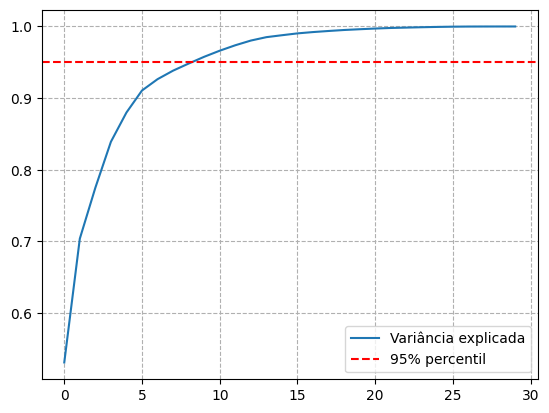

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()


Dessa forma, para reduzir a quantidade de dimensões para o valor encontrado pela análise, utilizamos o seguinte código. 

In [21]:
pca   = PCA(n_components=8)
X_pca = pca.fit_transform(X)

## Treinamento de Diferentes Modelos para Classificação

### Classificadores

Antes de realizar o treinamento dos modelos devemos separar nossos dados em dois conjuntos distintos, chamados de dados treino e dados de teste. O primeiro conjunto é utilizado para treinar o modelo, enquanto o segudo é utilizado para analisar o modelo em conjutno de dados que ainda não foram vistos durante o treinamento.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=99)


    K-Vizinhos mais Próximos (KNN)
    Máquina de Vetores de Suporte (SVM)
    Árvode de Decisão (DT)
    Florestas Aleatórias (RF)
    Regressão Logística (LR)
    Naive Bayes (NB)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


classificadores = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'LR' : LogisticRegression(),
    'NB' : GaussianNB()
}

### Treinando classificadores

In [29]:
import time
acuracia_treino = {}
tempo_treino    = {}

for clf in classificadores:
    start_time = time.process_time()
    classificadores[clf].fit(X_train, y_train)
    acuracia_treino[clf] = classificadores[clf].score(X_train, y_train)
    tempo_treino[clf]    = time.process_time() - start_time


/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo8

## Avaliação e Visualização de Desempenho

### Visualizando Desempenho - Treino

/tmp/ipykernel_15267/3627198043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[0], ec='k', palette='Set2')
/tmp/ipykernel_15267/3627198043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[1], ec='k', palette='Set2')


Text(0.5, 1.0, 'Tempo Treinamento')

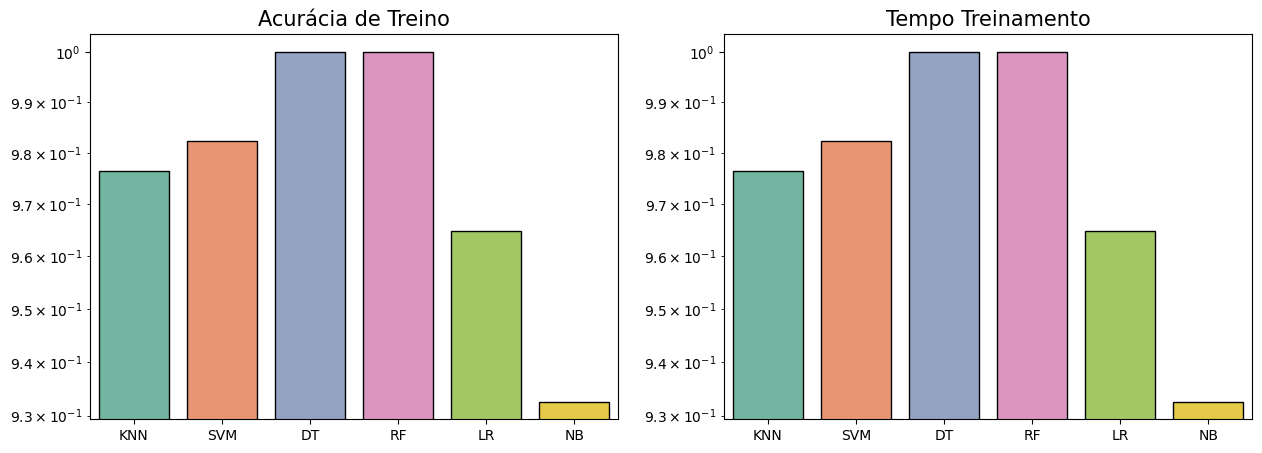

In [34]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[0], ec='k', palette='Set2')
sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[1], ec='k', palette='Set2')

ax[0].set_yscale('log')
ax[0].set_title('Acurácia de Treino', size=15)

ax[1].set_yscale('log')
ax[1].set_title('Tempo Treinamento', size=15)

### Visualizando Desempenho - Teste

Para analisar o desempenho dos podemos utilizar diversas métricas, como por exemplo:

    * Acurácia: Medir a proporção de previsões corretas em relação ao total de previsões feitas. É útil quando as classes estão balanceadas (isto é, cada classe tem aproximadamente o mesmo número de instâncias)
    * Precision: Avaliar a proporção de verdadeiros positivos (TP) entre todas as instâncias que foram preditas como positivas. Importante quando o custo de falsos positivos é alto, ou seja, é crucial evitar falsos alarmes.
    * Recall: Medir a proporção de verdadeiros positivos entre todas as instâncias que realmente são positivas. Essencial quando o custo de falsos negativos é alto, como em diagnósticos médicos, onde é importante identificar todas as ocorrências da classe positiva.
    * F1-Score: Fornecer uma média harmônica entre precisão (precision) e recall, equilibrando a importância de ambos. Útil em cenários onde há um trade-off entre precisão e recall, especialmente quando as classes estão desequilibradas.


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metricas = {}

for clf in classificadores:
    metricas[clf] = {}
    classificadores[clf].fit(X_train, y_train)
    predictions = classificadores[clf].predict(X_test)
    metricas[clf]['accuracy']  = accuracy_score(y_test, predictions)
    metricas[clf]['precision'] = precision_score(y_test, predictions, pos_label='M')
    metricas[clf]['recall']    = recall_score(y_test, predictions, pos_label='M')
    metricas[clf]['f1']        = f1_score(y_test, predictions, pos_label='M')

resultado = pd.DataFrame(metricas)

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo8

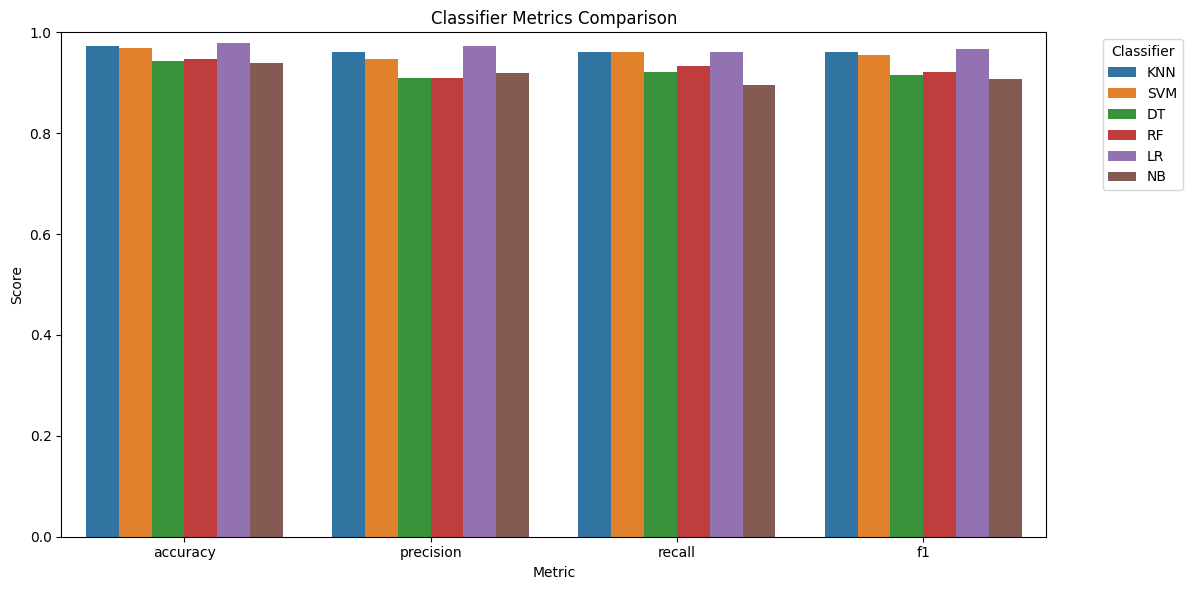

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert metricas dictionary to DataFrame
resultado = pd.DataFrame(metricas).T.reset_index().rename(columns={'index': 'classifier'})

# Convert to long (tidy) format for seaborn
resultado_long = resultado.melt(id_vars='classifier', 
                                 var_name='metric', 
                                 value_name='value')

# Plot: barplot of metrics by classifier
plt.figure(figsize=(12, 6))
sns.barplot(data=resultado_long, x='metric', y='value', hue='classifier')

plt.title("Classifier Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1)  # Since metrics range from 0 to 1
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

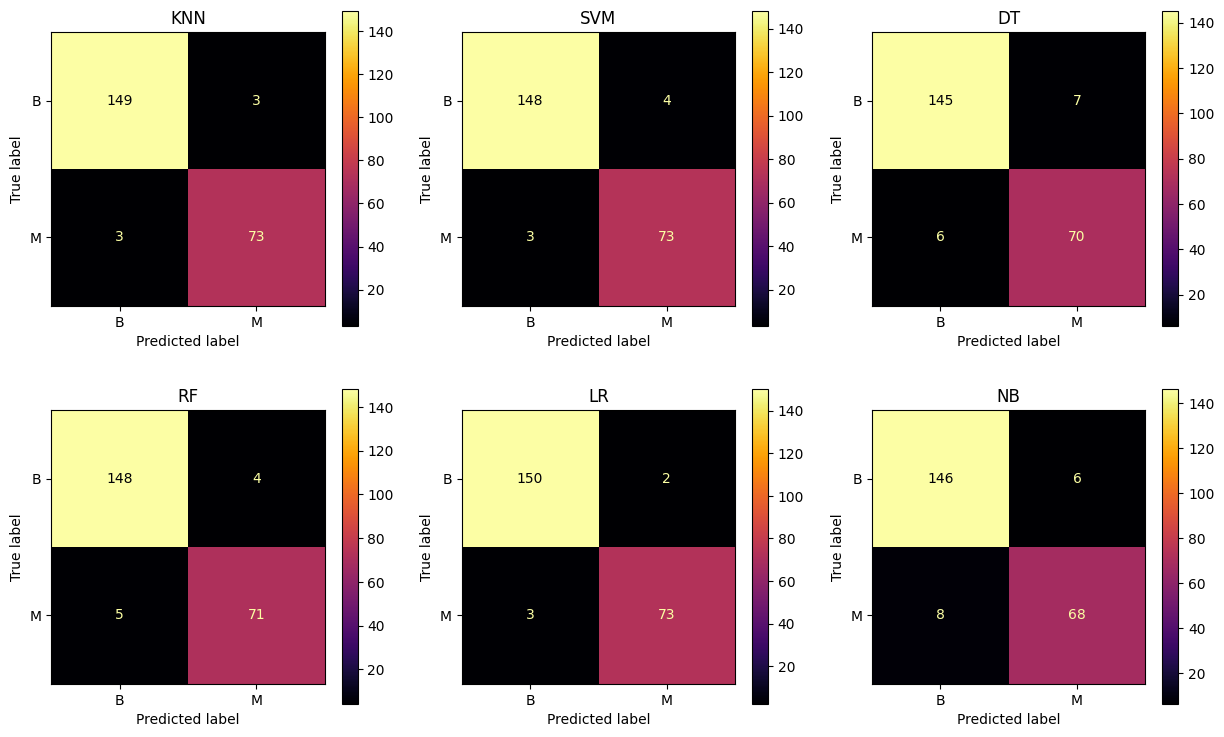

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    predictions = classificadores[clf].predict(X_test)
    cm = confusion_matrix(y_test, predictions, )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classificadores[clf].classes_, )
    disp.plot(ax=ax[idx], cmap='inferno') 
    ax[idx].set_title(clf)

### Ajustando Hiperparâmetros & Validação Cruzada

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/l

Text(0, 0.5, 'Acurácia média')

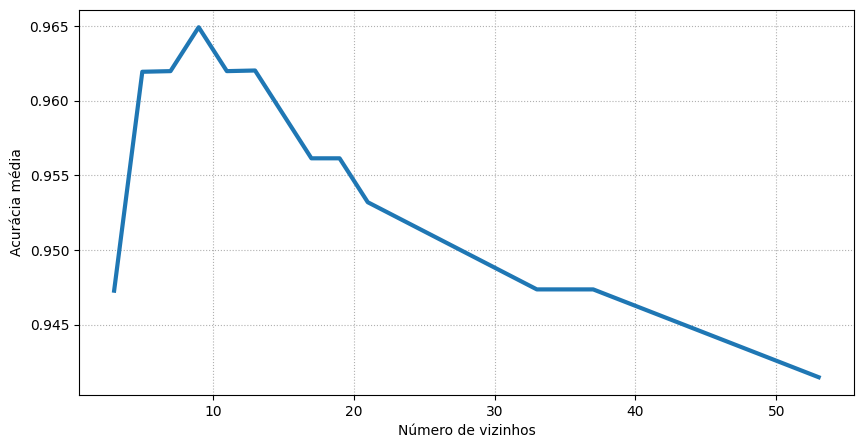

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ks   = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 33, 35, 53]
accs = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=ks, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia média')

### Visualizando Regiões de Decisão

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


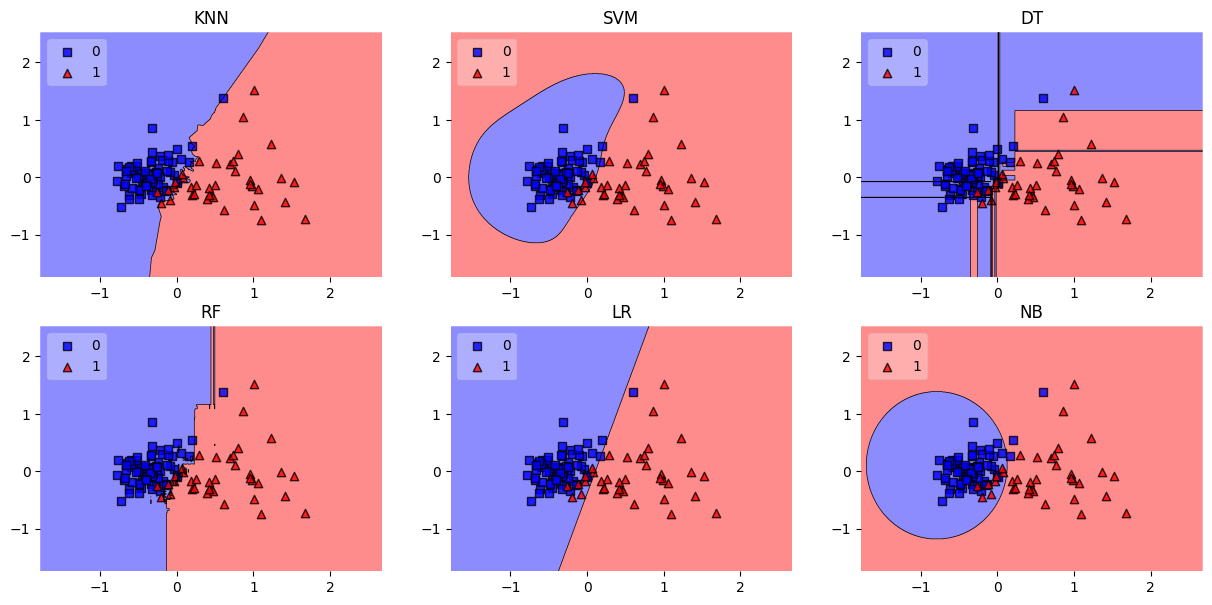

In [71]:
from sklearn.decomposition import PCA
import seaborn as sns

pca       = PCA(n_components=2)
dados_pca = pca.fit_transform(X)

x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.2, random_state=99, shuffle=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_treino = le.fit_transform(y_treino)

y_teste = le.fit_transform(y_teste)

from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    classificadores[clf].fit(x_treino, y_treino)
    plot_decision_regions(x_teste, y_teste, clf=classificadores[clf], 
                          legend=2, ax=ax[idx], colors='blue,red')
    ax[idx].set_title(clf)

In [54]:
from sklearn.decomposition import PCA
import seaborn as sns

pca       = PCA(n_components=2)
dados_pca = pca.fit_transform(X)

x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.2, random_state=99, shuffle=True)

In [55]:
y_teste = y_teste.to_numpy()


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_teste = le.fit_transform(y_teste)

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
y_teste

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0])

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


TypeError: can only concatenate str (not "int") to str

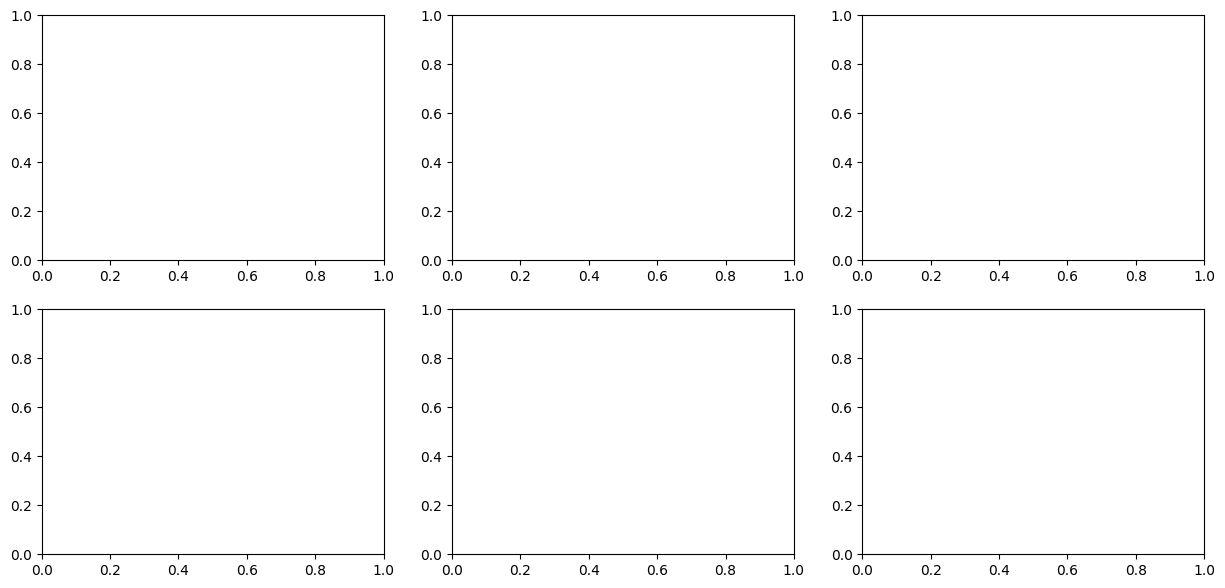

In [60]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    classificadores[clf].fit(x_treino, y_treino)
    plot_decision_regions(x_teste, y_teste, clf=classificadores[clf], 
                          legend=2, ax=ax[idx], colors='blue,red')
    ax[idx].set_title(clf)

/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/c-specp25-2/ra992741/Desktop/github/mo839/lab05/mo839/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


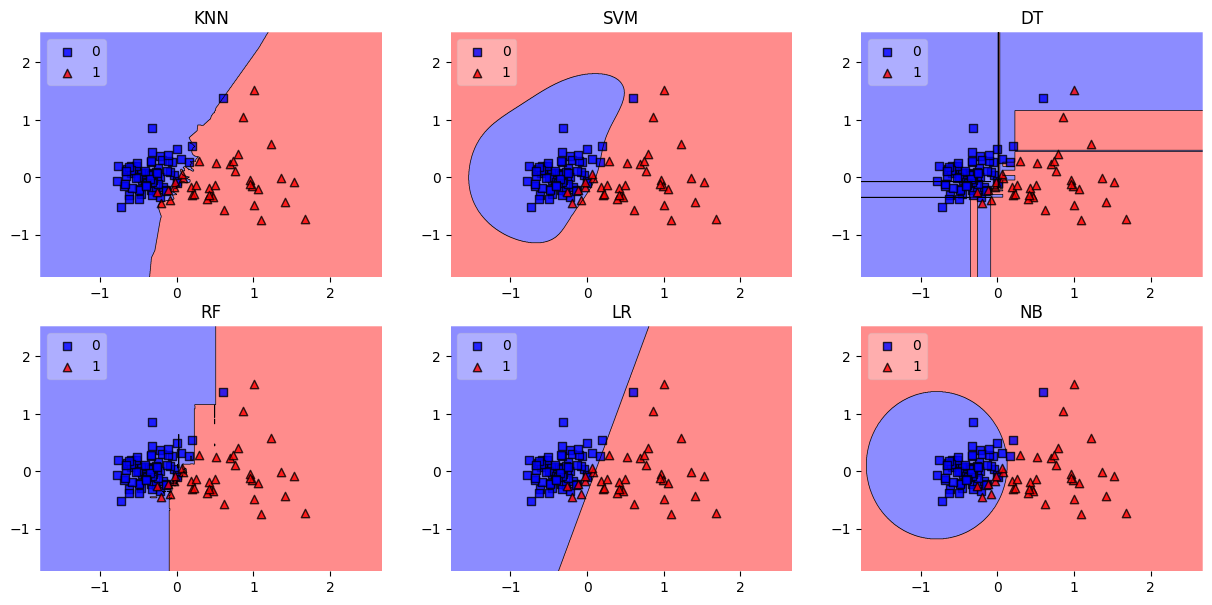

# Trabalho 2


1. Realizar a importação dos dados utilizando o ucimlrepo


2. Analizar o dataset, gerando visualizações


3. Realizar o pré-processamento dos dados tratanto atributos to tipo object, valores nulos, normalização e redução de dimensionalidade


4. Fazer o split dos dados para treino e teste


5. Treinar quatro classificadores diferentes ajustantando seus hiperparâmetros utilizando validação cruzada. Utilize o ray para distribuir o processamento para encontrar os melhores hiperparametros para cada classificador


6. Gerar visualizações para as seguintes métricas de acurácia, precision e recall


7. Gerar a matriz de confusão para cada classificador


8. Plotar as regiões de decisão para os classificadores
